# Klasifikasi Komentar Cyberharrassment Media Sosial : Instagram

### Membaca Data

In [1]:
import pandas as pd

df = pd.read_csv("datafix.csv")
df.head()

,Komen,klasifikasi
0,cantik tiada duanya. setuju. sangat setuju. yesss,0
1,Cantik teh??. Semangat terus aku cuman bisa be...,0
2,Cantikk buanget kak @ayutingting92,0
3,Cantikkk bingittttt....,0
4,masyallah auranya..,0


In [2]:
dataku = df.copy()
dataku.head()

,Komen,klasifikasi
0,cantik tiada duanya. setuju. sangat setuju. yesss,0
1,Cantik teh??. Semangat terus aku cuman bisa be...,0
2,Cantikk buanget kak @ayutingting92,0
3,Cantikkk bingittttt....,0
4,masyallah auranya..,0


In [3]:
dataku.shape

(3052, 2)

### Text Preprocessing

In [4]:
import re, string
import pandas as pd 

# membaca file normalisasi
df_norm = pd.read_csv("normal.txt")
# membuat kamus normalisasi (dictionary)
df_kamus = {}
for dt in df_norm.itertuples():
  df_kamus[dt[1]] = dt[2]

# kata-kata yang harus diphapus
word_to_remove = ['username', 'url']

def preprocess(row):
  # case folding
  row['Komen'] = row['Komen'].lower()

  # hapus menghapus
  row['Komen'] = re.sub(r"(?:\@|#|\d)\S+", "", row['Komen'])
    
  # hapus numerik
  row['Komen'] = re.sub(r"\d+", "", row['Komen'])

  # normalisasi kata
  row['Komen'] = ' '.join([df_kamus[a] if a in df_kamus else a for a in row['Komen'].split()])

  # hapus kata2 tertentu
  row['Komen'] = ' '.join([a for a in row['Komen'].split() if a not in word_to_remove])

  # ganti tanda baca jadi spasi
  row['Komen'] = row['Komen'].translate(str.maketrans(string.punctuation, " "*len(string.punctuation)))
    
  # normalisasi kata
  row['Komen'] = ' '.join([df_kamus[a] if a in df_kamus else a for a in row['Komen'].split()])
  return row

dataku = df.apply(preprocess, axis=1)  
dataku.head()

,Komen,klasifikasi
0,cantik tiada duanya setuju sangat setuju ya,0
1,cantik kakak semangat terus aku cuma bisa berd...,0
2,cantik banget kak,0
3,cantik banget,0
4,masyaallah auranya,0


In [5]:
def getNumber(str):
    if str==0:
        return 'No Cyberharrasment'
    else:
        return 'Cyberharrasment'
dataku["klasifikasi"]=dataku["klasifikasi"].apply(getNumber)

dataku.head()

,Komen,klasifikasi
0,cantik tiada duanya setuju sangat setuju ya,No Cyberharrasment
1,cantik kakak semangat terus aku cuma bisa berd...,No Cyberharrasment
2,cantik banget kak,No Cyberharrasment
3,cantik banget,No Cyberharrasment
4,masyaallah auranya,No Cyberharrasment


In [6]:
more_stopword = ['aduh','sheikh','wkwkwkwkk','deh','tv','woi','wr','wb','hehehe','ah','hehe','hihihi',
                 'weh','hehee','hahaha','hai','ayo','loh','umr','la','hahahaha','dulor','lip','matte','berl',
                 'otik','ih','urson','muuach','muuachh','mmm','eh','oh','lau','wa','playgroup','tuh',
                 'hahahahaaaaa','apasih','apain','wkwk','wkk','ulala','alah','wkwkwkwk','uh','deterzen','ngok',
                 'an','wkwkw','beb','bottoms','diapering','rugag','rugik','rigik','huaaaaa','eee','hahahahaha','hu','hihi',
                 'hahahha','o','aw','hah','guys','hahay','cu','wkwkkw','ngaab','meong','wkwkwk','ups','xnxx','wkwkwkwkwk','hik',
                 'xxnx','adududu','wkwkkwk','wkwkwkkk','suu','kekekekke','ahhahaha','awokawok','aw','wakakakaka','ppp','wih',
                 'hmm','rrrrrr','wkwwkwkwk','mwehehehe','wkwkkwkw','heheee','hahha','hahah','wwkwkwkw','ha','m','ehm','hahaaaaa',
                 'wkek','wouw','hhahhaaha','hahahaa','hha','ekekekekekekek','wakakakakak','kwwkwk','haha','ahahah','cie','hahahahah',
                 'hhahhaaha','hahahaa','opa','nih','kok','apa','kan',
                'yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'ia', 'seperti', 
                 'jika', 'jika', 'sehingga', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'setelah', 'kami', 
                 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'bisa',
                 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'saya', 'terhadap', 'secara',
                 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 
                 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'supaya', 'guna', 'kah', 'pun', 'sampai', 
                 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya',
                 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'demikian', 
                 'tapi', 'ingin', 'juga', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya',
                 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat',
                 'apalagi', 'bagaimanapun']

dataku['Komen'] = dataku['Komen'].apply(lambda x: " ".join(x for x in x.split() if x not in more_stopword))
dataku['Komen']

0                cantik tiada duanya setuju sangat setuju
1       cantik kakak semangat terus aku cuma berdoa ka...
2                                       cantik banget kak
3                                           cantik banget
4                                      masyaallah auranya
                              ...                        
3047          hebat bentuk jalur gitu kira kira ewe tidak
3048                    kalau mens tidak sih serius nanya
3049                          belahannya pengin aku colok
3050    ngomong ngomong cowok kalau lihat kak luna dos...
3051                                     kesannya murahan
Name: Komen, Length: 3052, dtype: object

In [7]:
dataku

,Komen,klasifikasi
0,cantik tiada duanya setuju sangat setuju,No Cyberharrasment
1,cantik kakak semangat terus aku cuma berdoa ka...,No Cyberharrasment
2,cantik banget kak,No Cyberharrasment
3,cantik banget,No Cyberharrasment
4,masyaallah auranya,No Cyberharrasment
...,...,...
3047,hebat bentuk jalur gitu kira kira ewe tidak,Cyberharrasment
3048,kalau mens tidak sih serius nanya,Cyberharrasment
3049,belahannya pengin aku colok,Cyberharrasment
3050,ngomong ngomong cowok kalau lihat kak luna dos...,Cyberharrasment


In [8]:
stopwordplus =  more_stopword

In [9]:
dataku.to_csv("stopword.csv", sep=',')

In [10]:
dataku = dataku.drop_duplicates(subset=['Komen'])

In [11]:
import numpy as np
dataku = dataku.replace('', np.nan).dropna()
dataku

,Komen,klasifikasi
0,cantik tiada duanya setuju sangat setuju,No Cyberharrasment
1,cantik kakak semangat terus aku cuma berdoa ka...,No Cyberharrasment
2,cantik banget kak,No Cyberharrasment
3,cantik banget,No Cyberharrasment
4,masyaallah auranya,No Cyberharrasment
...,...,...
3047,hebat bentuk jalur gitu kira kira ewe tidak,Cyberharrasment
3048,kalau mens tidak sih serius nanya,Cyberharrasment
3049,belahannya pengin aku colok,Cyberharrasment
3050,ngomong ngomong cowok kalau lihat kak luna dos...,Cyberharrasment


In [12]:
# STEMMING
# import StemmerFactory class

from nlp_id.lemmatizer import Lemmatizer 
lemmatizer = Lemmatizer() 

def lemmaku(data):
    for col in data:
        for index in data.index:
            data.loc[index, col] = lemmatizer.lemmatize(data.loc[index, col])
        
lemmaku(dataku)
dataku.head()

,Komen,klasifikasi
0,cantik tiada dua tuju sangat tuju,no cyberharrasment
1,cantik kakak semangat terus aku cuma doa kakak...,no cyberharrasment
2,cantik banget kak,no cyberharrasment
3,cantik banget,no cyberharrasment
4,masyaallah aura,no cyberharrasment


In [13]:
dataku.to_csv("lemma.csv", sep=',')

In [14]:
dataku.head(10)

,Komen,klasifikasi
0,cantik tiada dua tuju sangat tuju,no cyberharrasment
1,cantik kakak semangat terus aku cuma doa kakak...,no cyberharrasment
2,cantik banget kak,no cyberharrasment
3,cantik banget,no cyberharrasment
4,masyaallah aura,no cyberharrasment
5,cantik banget foto,no cyberharrasment
6,cantik,no cyberharrasment
7,cantik lebih cantik baju nya tutup,no cyberharrasment
8,mantap cantik,no cyberharrasment
9,aurat kamu kakak,no cyberharrasment


In [15]:
# memberikan kategori 0, 1
from io import StringIO
col = ['Komen', 'klasifikasi']
dataku= dataku[col]
dataku= dataku[pd.notnull(dataku['Komen'])]

dataku.columns = ['Komen', 'klasifikasi']
dataku['kategori_id'] = dataku['klasifikasi'].factorize()[0]

# Sorting dari nilai kategori_id
kategori_id_data = dataku[['klasifikasi', 'kategori_id']].sort_values('kategori_id')

# Membuat dictionary dari value kategori_id_data
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['kategori_id', 'klasifikasi']].values)
dataku.head()

,Komen,klasifikasi,kategori_id
0,cantik tiada dua tuju sangat tuju,no cyberharrasment,0
1,cantik kakak semangat terus aku cuma doa kakak...,no cyberharrasment,0
2,cantik banget kak,no cyberharrasment,0
3,cantik banget,no cyberharrasment,0
4,masyaallah aura,no cyberharrasment,0


In [16]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('data.xlsx', engine='xlsxwriter')
dataku.to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [17]:
#simpan dalam bentuk csv
dataku.to_csv("dataku.csv", sep=',')

#membaca dalam bentuk csv
import pandas as pd
data = pd.read_csv('dataku.csv')
data.head()

,Unnamed: 0,Komen,klasifikasi,kategori_id
0,0,cantik tiada dua tuju sangat tuju,no cyberharrasment,0
1,1,cantik kakak semangat terus aku cuma doa kakak...,no cyberharrasment,0
2,2,cantik banget kak,no cyberharrasment,0
3,3,cantik banget,no cyberharrasment,0
4,4,masyaallah aura,no cyberharrasment,0


### TF-IDF

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 2), tokenizer=None, analyzer = 'word', stop_words=stopwordplus)
countvec = count_vectorizer.fit_transform(data.Komen).toarray()
countvec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
countvec2 = pd.DataFrame(countvec)
countvec2

,0,1,2,3,4,5,6,7,8,9,...,10794,10795,10796,10797,10798,10799,10800,10801,10802,10803
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
kata_kata = count_vectorizer.get_feature_names()
countvec3 = pd.DataFrame(countvec, columns=kata_kata)
countvec3

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abadi,abang,abang asli,abang aurat,abang coba,abang kamu,abang khodam,abang luna,abang serabi,acara,...,zar diam,zara,zara kemarin,zara spill,zaskia,zaskia cantik,zaskia kasih,zaskia mah,zina,zina mata
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Menghitung TF-IDF 

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transformer.fit_transform(countvec)
tfidf

<2890x10804 sparse matrix of type '<class 'numpy.float64'>'
	with 25824 stored elements in Compressed Sparse Row format>

In [22]:
# Mengubah menjadi array
tfidf1 = tfidf.toarray()
tfidf1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf2 = pd.DataFrame(tfidf1)
tfidf2

,0,1,2,3,4,5,6,7,8,9,...,10794,10795,10796,10797,10798,10799,10800,10801,10802,10803
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
kata_kata2 = count_vectorizer.get_feature_names()
df1 = pd.DataFrame(tfidf1, columns=kata_kata2)
df1
#kalau mau disave
df1.to_csv("df1.csv")

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
# Menggabungkan kategori_id dengan matriks tf-idf

result = pd.concat([data['kategori_id'],df1], axis=1)
result

,kategori_id,abadi,abang,abang asli,abang aurat,abang coba,abang kamu,abang khodam,abang luna,abang serabi,...,zar diam,zara,zara kemarin,zara spill,zaskia,zaskia cantik,zaskia kasih,zaskia mah,zina,zina mata
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2886,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2887,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2888,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y = result['kategori_id'] 
y

0       0
1       0
2       0
3       0
4       0
       ..
2885    1
2886    1
2887    1
2888    1
2889    1
Name: kategori_id, Length: 2890, dtype: int64

In [27]:
X=df1
X.head()

,abadi,abang,abang asli,abang aurat,abang coba,abang kamu,abang khodam,abang luna,abang serabi,acara,...,zar diam,zara,zara kemarin,zara spill,zaskia,zaskia cantik,zaskia kasih,zaskia mah,zina,zina mata
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SMOTE for Balancing Data

In [28]:
!pip install imbalanced-learn

In [29]:
import numpy as np
import pandas as pd
import pyodbc as odbc 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
#Add this script
import matplotlib

#Before
import matplotlib.pyplot as plt

1    2031
0     859
Name: kategori_id, dtype: int64

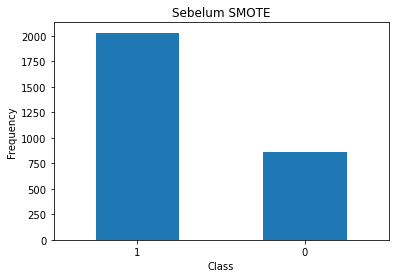

In [30]:
pd.value_counts(y).plot.bar()
plt.title('Sebelum SMOTE')
plt.xticks(rotation=0)
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

In [31]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

0    2031
1    2031
Name: kategori_id, dtype: int64

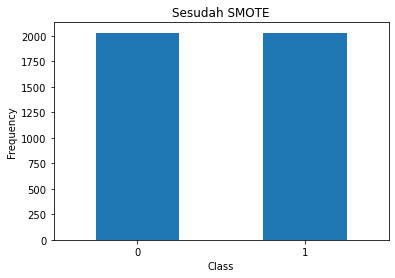

In [32]:
pd.value_counts(y_sm).plot.bar()
plt.title('Sesudah SMOTE')
plt.xticks(rotation=0)
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_sm)

In [33]:
X_sm.head() #cek rownya nambah 

,abadi,abang,abang asli,abang aurat,abang coba,abang kamu,abang khodam,abang luna,abang serabi,acara,...,zar diam,zara,zara kemarin,zara spill,zaskia,zaskia cantik,zaskia kasih,zaskia mah,zina,zina mata
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y_sm.head() #cek length nya nambah

0    0
1    0
2    0
3    0
4    0
Name: kategori_id, dtype: int64

### Split Dataset

In [35]:
#membagi data training dan data testing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#splitting train and test

X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    stratify=y_sm,
    test_size=0.2,
    random_state=123)

In [36]:
y_test.head()

2957    0
1899    1
2640    1
1912    1
390     0
Name: kategori_id, dtype: int64

### Compare Model

In [37]:
#Modelling module
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
#Evaluation module
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [38]:
#Model Benchmark

DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
AdaBoost = AdaBoostClassifier()

In [39]:
#List Model

listmodel = [DT, RF, GB, AdaBoost]
namamodel = ["Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost"]

In [40]:
#Komparasi model

Skfold = StratifiedKFold(n_splits=5)
acc_model = []
acc_std = []

for model in listmodel :
  hasil_akurasi = cross_val_score(model, X_train, y_train, cv = Skfold)
  acc_model.append(hasil_akurasi.mean())
  acc_std.append(hasil_akurasi.std())

In [41]:
#Komparasi Model

pembanding = pd.DataFrame({
    'Nama Model' : namamodel,
    'Rata-rata Akurasi' : acc_model,
    'Standar Deviasi Akurasi' : acc_std
})

pembanding

,Nama Model,Rata-rata Akurasi,Standar Deviasi Akurasi
0,Decision Tree,0.839956,0.013976
1,Random Forest,0.885503,0.009361
2,Gradient Boosting,0.847957,0.007494
3,AdaBoost,0.858417,0.005176


In [42]:
hasil_akurasi = cross_val_score(RF, X_train, y_train, cv = Skfold)
hasil_akurasi

array([0.87230769, 0.88153846, 0.88153846, 0.90461538, 0.88906009])

In [43]:
RF = RandomForestClassifier(random_state=12)

# fit the model to the training set
RF.fit(X_train, y_train)

# Predict on the test set results
y_prediksi = RF.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_prediksi)))

Model accuracy score with 100 decision-trees : 0.8954


In [44]:
print(classification_report(y_test, y_prediksi))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       407
           1       0.87      0.93      0.90       406

    accuracy                           0.90       813
   macro avg       0.90      0.90      0.90       813
weighted avg       0.90      0.90      0.90       813



In [45]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

### Tuning Parameter

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

In [48]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
             'max_features': ['auto','sqrt', 'log2'], 
             'max_depth': [80,85,90,95,100,105,110,115,120,125,130,135,140,145,150], 
             'min_samples_split': [2,4,6,8,10], 
             'min_samples_leaf': [1,4,6,8,10], 
             'bootstrap': [True, False],
              'random_state': [12]
             }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 4, 6, 8, 10], 'bootstrap': [True, False], 'random_state': [12]}


In [49]:
rf_Model = RandomForestClassifier(random_state=0)

In [50]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs=4)

In [51]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 11250 candidates, totalling 33750 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 85, 90, 95, 100, 105, 110, 115, 120,
                                       125, 130, 135, 140, 145, 150],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [12]},
             verbose=2)

In [52]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 150,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400,
 'random_state': 12}

In [53]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.986
Test Accuracy - : 0.904


### Predict

In [54]:
model = RandomForestClassifier(n_estimators=400, bootstrap = False, 
                             max_depth = 150, 
                             max_features = "log2", min_samples_split = 2, min_samples_leaf = 1, random_state=12)

# fit the model to the training set
model.fit(X_train, y_train)

# Predict on the test set results
y_pred = model.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9041


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       407
           1       0.86      0.97      0.91       406

    accuracy                           0.90       813
   macro avg       0.91      0.90      0.90       813
weighted avg       0.91      0.90      0.90       813



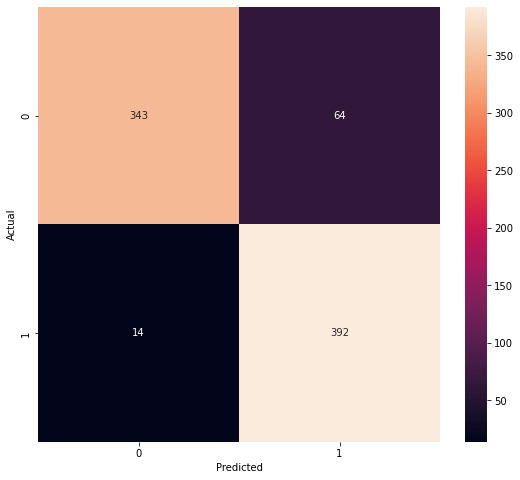

In [56]:
# Making the Confusion Matrix good visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(conf_mat, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [57]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[343,  64],
       [ 14, 392]], dtype=int64)

### Pipeline

In [58]:
#Model pipeline

from sklearn.pipeline import Pipeline

tf_idf = CountVectorizer(encoding='latin-1', ngram_range=(1, 2), 
                                         tokenizer=None, analyzer = 'word', stop_words=stopwordplus)
model = RandomForestClassifier(n_estimators=400, bootstrap = False, 
                             max_depth = 150, 
                             max_features = "log2", min_samples_split = 2, min_samples_leaf = 1, random_state=12)

modelpipeline = Pipeline([
                  ('tfidf',tf_idf),
                  ('model',model)
])

In [59]:
#Fit Pipeline
modelpipeline.fit(data['Komen'],data['klasifikasi'])

Pipeline(steps=[('tfidf',
                 CountVectorizer(encoding='latin-1', ngram_range=(1, 2),
                                 stop_words=['aduh', 'sheikh', 'wkwkwkwkk',
                                             'deh', 'tv', 'woi', 'wr', 'wb',
                                             'hehehe', 'ah', 'hehe', 'hihihi',
                                             'weh', 'hehee', 'hahaha', 'hai',
                                             'ayo', 'loh', 'umr', 'la',
                                             'hahahaha', 'dulor', 'lip',
                                             'matte', 'berl', 'otik', 'ih',
                                             'urson', 'muuach', 'muuachh', ...])),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=150,
                                        max_features='log2', n_estimators=400,
                                        random_state=12))])

In [60]:
modelpipeline.predict(data['Komen'])

array(['no cyberharrasment', 'no cyberharrasment', 'no cyberharrasment',
       ..., 'cyberharrasment', 'cyberharrasment', 'cyberharrasment'],
      dtype=object)

In [91]:
post="tubuhnya bagus sampai mataku sakit melihatnya"

In [92]:
modelpipeline.predict([post])

array(['cyberharrasment'], dtype=object)

In [93]:
modelpipeline.predict_proba([post])

array([[0.69623943, 0.30376057]])

In [94]:
post="mau muntah liat mukanya, pergi aja deh"

In [95]:
modelpipeline.predict([post])

array(['cyberharrasment'], dtype=object)

In [96]:
modelpipeline.predict_proba([post])

array([[0.74021679, 0.25978321]])

In [97]:
post="rambutnya kalo dari belakang kek mbak kunti asli serem"

In [98]:
modelpipeline.predict([post])

array(['cyberharrasment'], dtype=object)

In [99]:
modelpipeline.predict_proba([post])

array([[0.80338255, 0.19661745]])

In [100]:
post="aku dulu benci dan pengin gitu hujat tapi sekarang aku senang lihat dia"

In [101]:
modelpipeline.predict([post])

array(['no cyberharrasment'], dtype=object)

In [102]:
modelpipeline.predict_proba([post])

array([[0.43343014, 0.56656986]])

In [103]:
post="parah slide kedua kaya orang hamil, gembrot"

In [104]:
modelpipeline.predict([post])

array(['cyberharrasment'], dtype=object)

In [105]:
modelpipeline.predict_proba([post])

array([[0.75138774, 0.24861226]])

In [106]:
post="mendadak kalem ggra ketemu mantan, jadi keliatan anggun banget, mana cantik banget lagi disini"

In [107]:
modelpipeline.predict([post])

array(['no cyberharrasment'], dtype=object)

In [108]:
modelpipeline.predict_proba([post])

array([[0.46942144, 0.53057856]])

In [109]:
import pickle
pickle.dump(modelpipeline, open("putripickle.pkl", 'wb'))

In [110]:
import pickle
pickle.dump(modelpipeline, open("putripickle", 'wb'))

In [111]:
import joblib
joblib.dump(modelpipeline, 'pipelineini')

['pipelineini']